In [15]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from time import sleep
from statsmodels.tsa.stattools import adfuller

In [2]:
# Import data
df = pd.read_csv("outputs\\df_data.csv")
df.head()

,type,geometry.type,geometry.coordinates,properties.values,properties.unit.state.area,properties.unit.state.year_of_planting,properties.unit.state.variety,properties.unit.metadata,properties.unit.id,properties.unit.full_name,...,2020-02-15_array,2020-02-15,2020-03-11_array,2020-03-11,2020-04-15_array,2020-04-15,2020-04-20_array,2020-04-20,Kg/Ha,Kg/Ha_date
0,Feature,Polygon,"[[[-75.6396578867764, -14.199701335951724], [-...","[{'value': 3581.158766439885, 'variety': {}, '...",6.530601,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90214,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.36,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.585075,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.587418,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.623925,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.649108,3581.158766,2019-09-19
1,Feature,Polygon,"[[[-75.64231663022875, -14.20062882414364], [-...","[{'value': 4037.3751791811173, 'variety': {}, ...",6.555069,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90215,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.37,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.587701,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.585747,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.622790,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.650104,4037.375179,2019-09-19
2,Feature,Polygon,"[[[-75.63898926117189, -14.201527268326426], [...","[{'value': 4658.420440484501, 'variety': {}, '...",6.533254,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90216,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.42,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.593903,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.600877,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.628707,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.660342,4658.420440,2019-09-19
3,Feature,Polygon,"[[[-75.64164955317383, -14.202454024468352], [...","[{'value': 4196.272165747293, 'variety': {}, '...",6.551013,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90217,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.43,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.595797,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.601193,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.622388,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.655480,4196.272166,2019-09-19
4,Feature,Polygon,"[[[-75.64164955317383, -14.202454024468352], [...","[{'value': 4744.580970357842, 'variety': {}, '...",6.534646,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90218,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.48,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.603345,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.614018,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.634250,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.672965,4744.580970,2019-09-19


# Correlation analysis

In [3]:
#Get general results per lot
NDVI_cols = [col for col in df.columns if ('-' in col) & ("array" not in col)]
NDVI_cols_2019 = [col for col in NDVI_cols if ('2019' in col)]
NDVI_cols_2019_09 = [col for col in NDVI_cols_2019 if ('09-' in col)]
NDVI_cols_2019_before_09 = [col for col in NDVI_cols_2019 if ('09-' not in col) & ('10-' not in col) & ('11-' not in col) & ('12-' not in col)]

def get_stats(df, cols, cols_name):
    df["average_" + cols_name] = df[cols].mean(axis = 1)
    df["std_" + cols_name] = df[cols].std(axis = 1)
    df["not_null_" + cols_name] = df[cols].count(axis = 1)
    df["min_" + cols_name] = df[cols].min(axis = 1)
    df["first_quantile_" + cols_name] = df[cols].quantile(0.25, axis = 1)
    df["second_quantile_" + cols_name] = df[cols].quantile(0.5, axis = 1)
    df["third_quantile_" + cols_name] = df[cols].quantile(0.75, axis = 1)
    df["max_" + cols_name] = df[cols].max(axis = 1)
    
    return(df)
    
    
for cols in [[NDVI_cols, "NDVI_cols"], [NDVI_cols_2019, "NDVI_cols_2019"], [NDVI_cols_2019_09, "NDVI_cols_2019_09"], [NDVI_cols_2019_before_09, "NDVI_cols_2019_before_09"]]:
    get_stats(df, cols[0], cols[1])

df.head()


,type,geometry.type,geometry.coordinates,properties.values,properties.unit.state.area,properties.unit.state.year_of_planting,properties.unit.state.variety,properties.unit.metadata,properties.unit.id,properties.unit.full_name,...,third_quantile_NDVI_cols_2019_09,max_NDVI_cols_2019_09,average_NDVI_cols_2019_before_09,std_NDVI_cols_2019_before_09,not_null_NDVI_cols_2019_before_09,min_NDVI_cols_2019_before_09,first_quantile_NDVI_cols_2019_before_09,second_quantile_NDVI_cols_2019_before_09,third_quantile_NDVI_cols_2019_before_09,max_NDVI_cols_2019_before_09
0,Feature,Polygon,"[[[-75.6396578867764, -14.199701335951724], [-...","[{'value': 3581.158766439885, 'variety': {}, '...",6.530601,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90214,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.36,...,0.502879,0.522066,0.553531,0.042193,21,0.471451,0.518513,0.554990,0.581761,0.611917
1,Feature,Polygon,"[[[-75.64231663022875, -14.20062882414364], [-...","[{'value': 4037.3751791811173, 'variety': {}, ...",6.555069,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90215,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.37,...,0.511076,0.528146,0.552537,0.041856,21,0.470786,0.516079,0.554301,0.580506,0.612492
2,Feature,Polygon,"[[[-75.63898926117189, -14.201527268326426], [...","[{'value': 4658.420440484501, 'variety': {}, '...",6.533254,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90216,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.42,...,0.519074,0.540435,0.571544,0.042075,21,0.489557,0.537711,0.579759,0.601865,0.629699
3,Feature,Polygon,"[[[-75.64164955317383, -14.202454024468352], [...","[{'value': 4196.272165747293, 'variety': {}, '...",6.551013,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90217,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.43,...,0.519640,0.534169,0.563879,0.040833,21,0.483673,0.533012,0.570997,0.590695,0.622998
4,Feature,Polygon,"[[[-75.64164955317383, -14.202454024468352], [...","[{'value': 4744.580970357842, 'variety': {}, '...",6.534646,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90218,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.48,...,0.522225,0.555315,0.577583,0.043442,21,0.492963,0.547159,0.589550,0.608519,0.638184


,std_NDVI_cols_2019,std_NDVI_cols_2019_before_09,max_NDVI_cols_2019,third_quantile_NDVI_cols_2019_before_09,max_NDVI_cols_2019_before_09,max_NDVI_cols,third_quantile_NDVI_cols_2019,average_NDVI_cols_2019_before_09,second_quantile_NDVI_cols_2019_before_09,second_quantile_NDVI_cols_2019,...,second_quantile_NDVI_cols_2019_09,first_quantile_NDVI_cols_2019_09,std_NDVI_cols_2019_09,first_quantile_NDVI_cols,std_NDVI_cols,min_NDVI_cols,not_null_NDVI_cols,not_null_NDVI_cols_2019,not_null_NDVI_cols_2019_09,not_null_NDVI_cols_2019_before_09
Kg/Ha,0.89988,0.831545,0.828841,0.819209,0.813873,0.813764,0.812578,0.80885,0.804861,0.803752,...,0.736661,0.735791,0.728324,0.719537,0.714196,0.690111,0.685219,NaN,NaN,NaN


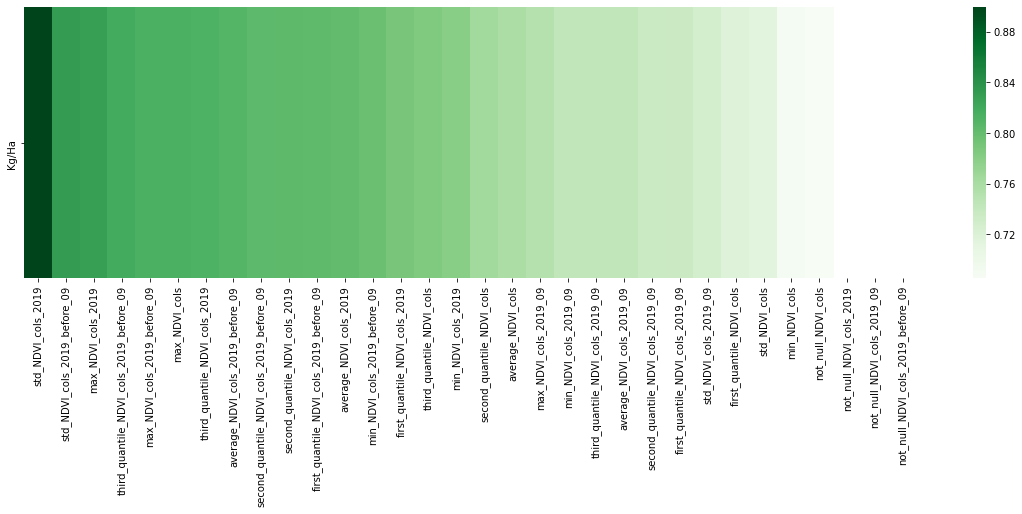

In [4]:
#Get correlations
not_corr_columns = NDVI_cols + ["properties.unit.state.area", "properties.unit.id"]

df_corr = df.drop(not_corr_columns, axis = 1).corr()
df_corr = df_corr.loc[df_corr.index == 'Kg/Ha']
df_corr = df_corr.drop("Kg/Ha", axis = 1)
df_corr = df_corr.sort_values("Kg/Ha", axis = 1, ascending = False)
df_corr.to_excel("outputs\\df_corr.xlsx")

fig, ax = plt.subplots(figsize=(20,5))  
corr_heatmap=sns.heatmap(df_corr,cmap='Greens')
corr_heatmap.figure.savefig("outputs\\correlation_analysis.png",bbox_inches="tight", ax = ax)

df_corr

# Conclusiones de correlación

- Los agricultores tienen razón:

Las variables estadísticas de NDVI muestran correlaciones mayores a 0.685 con los kilogramos producidos por hectárea. Con esta correlación agregada a la experiencia y la base teórica se puede afirmar que existe una relación entre el NDVI y el rendimiento del cultivo.

- La desviación estándar y los valores altos de NDVI son los indicadores más importantes para la productividad en fechas cercanas a la medición de productividad:

Es importante entender cómo interpretar las variables con mayor correlación.
Hipótesis: Esta alta correlación se da porque el NDVI se encuentra en el nivel más alto en momentos cercanos de la medición. Esto explicaría la correlación con el valor máximo, el valor del tercer cuartil y con las desviación estándar, ya que el NDVI se encontraría en aumento en esas fechas lo que arrojaría una alta desviación.

- El valor máximo es más importante que el valor promedio:

Para todos los grupos de variables estadísticas (general, 2019, 2019 antes de septiembre y septiembre de 2019) la correlación entre la producción y el valor máximo del NDVI es mayor que el de la producción y el promedio. Esto indica que los cultivos con valor del NDVI más alto son los que presentan cultivos con mayor producción.

- Los valores del NDVI en rangos de tiempo largos explican mejor la productividad que en rangos de tiempo cortos:

Como vemos las variables estadísticas relacionadas a septiembre de 2019 presentan las correlaciones más bajas frente a la productividad. Mientras que las variables estadísticas con mayor correlación son las relacionadas al 2019 y 2019 hasta antes de septiembre. Es importante encontrar el rango de tiempo adecuado si se busca hacer una regresión lineal.

# Visualizing time series

  Kg/Ha_level        Kg/Ha
0    Low_prod  1152.994972
1    Med_prod  4252.770622
2   High_prod  5356.548006


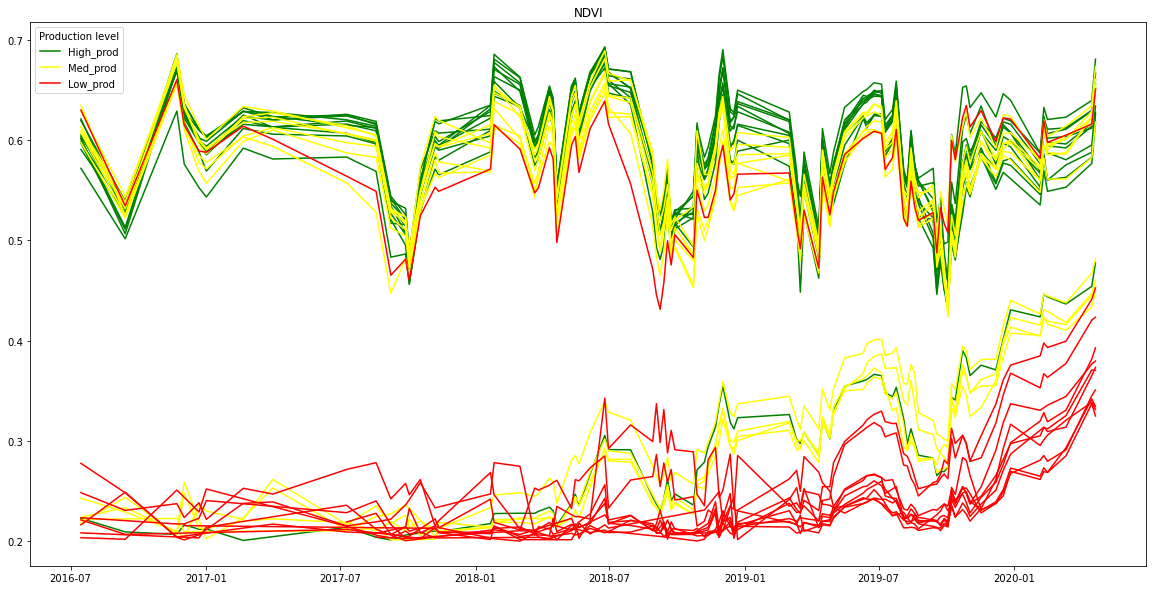

In [5]:
#Get High, Med, Low production IDs
df = df.sort_values("Kg/Ha", ascending = False)
df["Kg/Ha_level"] = pd.qcut(df["Kg/Ha"], 3, labels=["Low_prod", "Med_prod", "High_prod"])

print(df[["Kg/Ha_level", "Kg/Ha"]].groupby("Kg/Ha_level", as_index = False).mean())

High_ids = df.loc[df["Kg/Ha_level"] == "High_prod"]["properties.unit.id"]
Med_ids = df.loc[df["Kg/Ha_level"] == "Med_prod"]["properties.unit.id"]
Low_ids = df.loc[df["Kg/Ha_level"] == "Low_prod"]["properties.unit.id"]

#Time series data format
df_time_series = df.set_index("properties.unit.id")
df_time_series = df_time_series[NDVI_cols].transpose()
df_time_series.index = pd.to_datetime(df_time_series.index)

#Color for each production level
color_dict = {
                "High_prod" : "green",
                "Med_prod" : "yellow",
                "Low_prod" : "red"
             }

fig, ax = plt.subplots(figsize=(20,10))  

high = 0
med = 0
low = 0

#Draw all lots NDVIs per date, colored by production level
for col in df_time_series.columns:
    
    level = df.loc[df["properties.unit.id"] == col]["Kg/Ha_level"].values[0]
    color = color_dict[level]
    if level == "High_prod":
        if high == 0:
            high = 1
            time_graph = sns.lineplot(data = df_time_series[col], dashes = False, label = level, color = color)
        else: time_graph = sns.lineplot(data = df_time_series[col], dashes = False, color = color)
    elif level == "Med_prod":
        if med == 0:
            med = 1
            time_graph = sns.lineplot(data = df_time_series[col], dashes = False, label = level, color = color)
        else: time_graph = sns.lineplot(data = df_time_series[col], dashes = False, color = color)
    else:
        if low == 0:
            low = 1
            time_graph = sns.lineplot(data = df_time_series[col], dashes = False, label = level, color = color)
        else: time_graph = sns.lineplot(data = df_time_series[col], dashes = False, color = color)
            
    

time_graph.set_title("NDVI")
time_graph.legend(title = "Production level", loc='upper left')
time_graph.figure.savefig("outputs\\time_series_analysis.png",bbox_inches="tight", ax = ax)
plt.show()
plt.close()


El gráfico refuerza la correlación entre el nivel de NDVI y el nivel de producción de los lotes

Se observa una diferencia marcada entre dos grupos de series temporales.

Agruparemos las series temporales según su promedio. El corte será en 0.4

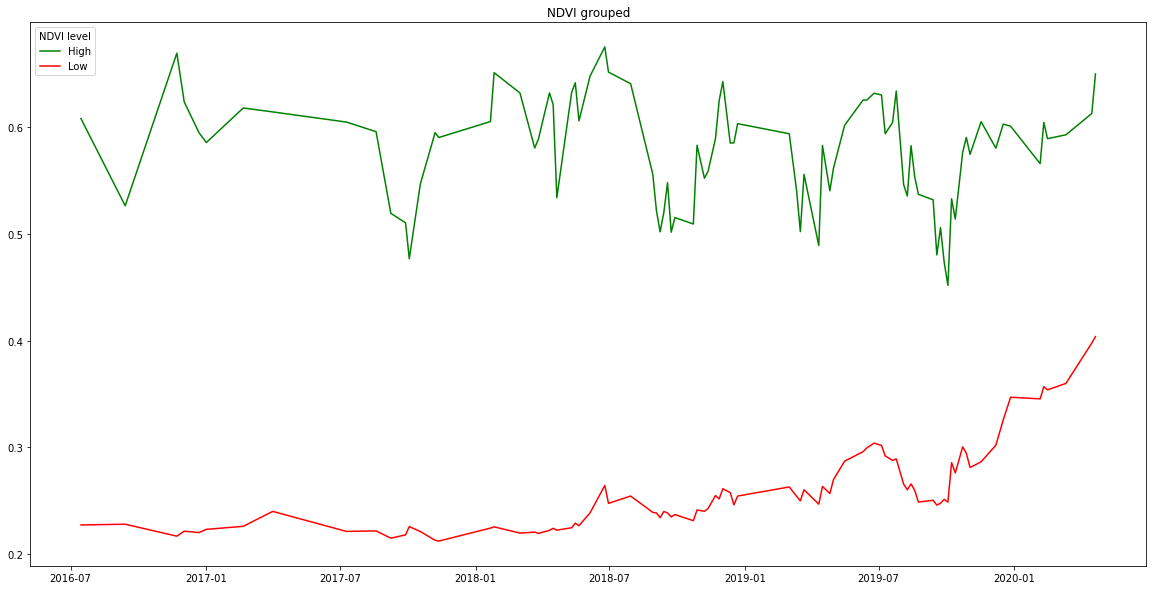

In [6]:
#Draw NDVIs per date, lots grouped by NDVI level

fig, ax = plt.subplots(figsize=(20,10))  

High_ids = df.loc[df["average_NDVI_cols"] >0.4]["properties.unit.id"]
Low_ids = df.loc[df["average_NDVI_cols"] <= 0.4]["properties.unit.id"]

df_time_series["High"] = df_time_series[High_ids].mean(axis = 1)
df_time_series["Low"] = df_time_series[Low_ids].mean(axis = 1)

time_grouped_graph = sns.lineplot(data = df_time_series["High"], dashes = False, label = "High", color = "green")
time_grouped_graph = sns.lineplot(data = df_time_series["Low"], dashes = False, label = "Low", color = "red")

time_grouped_graph.set_title("NDVI grouped")
time_grouped_graph.legend(title = "NDVI level", loc='upper left')
time_grouped_graph.figure.savefig("outputs\\time_series_grouped_analysis.png",bbox_inches="tight", ax = ax)

plt.show()
plt.close()

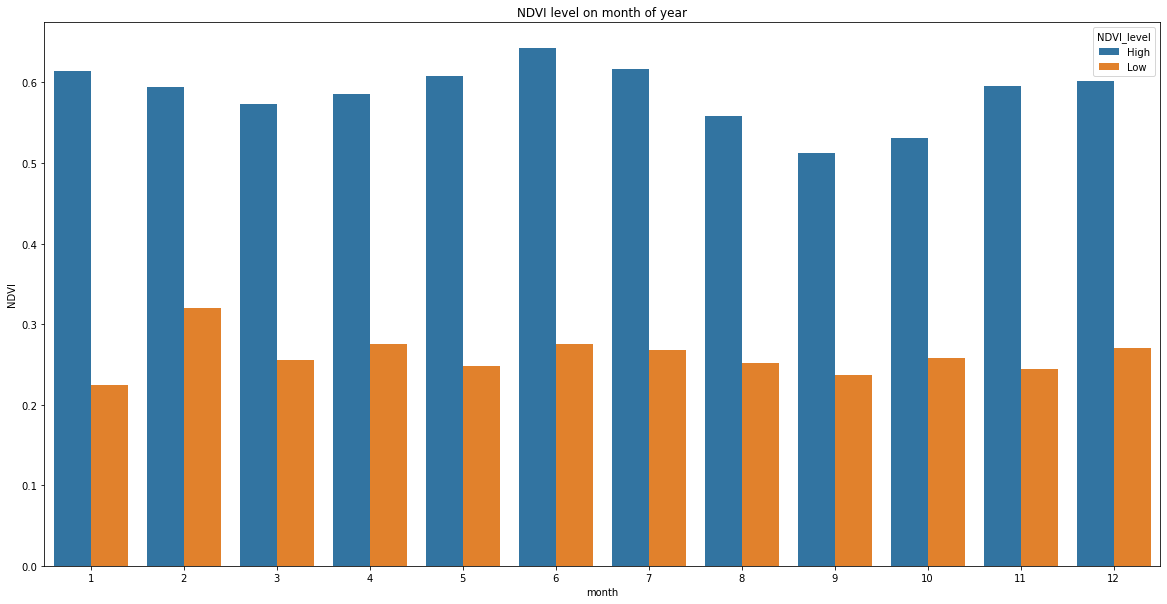

In [7]:
#Check on month of year bevaiour
df_time_series["month"] = df_time_series.index.month
df_month_of_year = df_time_series[["High", "Low", "month"]].groupby("month", as_index = False).mean()
df_month_of_year = df_month_of_year.melt(id_vars='month').rename(columns = {"value" : "NDVI", "properties.unit.id" : "NDVI_level"})
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(data = df_month_of_year, x = "month", y = "NDVI", hue = "NDVI_level")
plt.title("NDVI level on month of year")
plt.savefig("outputs\\plot_month_of_year.png")


Observamos picos del nivel de NDVI en enero y junio para los niveles altos de NDVI, mientras que para los niveles bajos resalta un pico en febrero.

# Dickey-Fuller test and rolling stats

# Decomposing time series

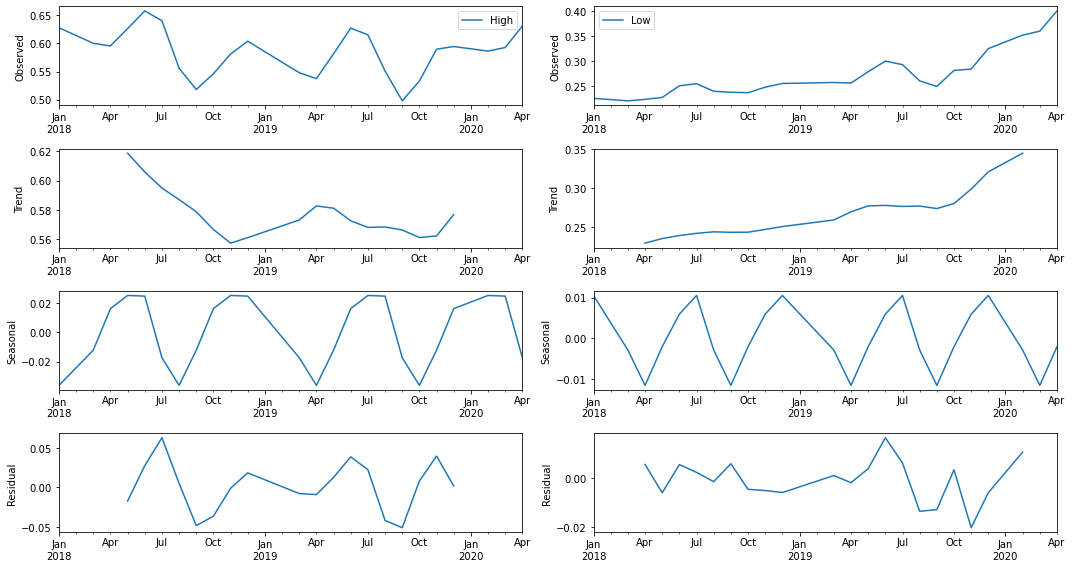

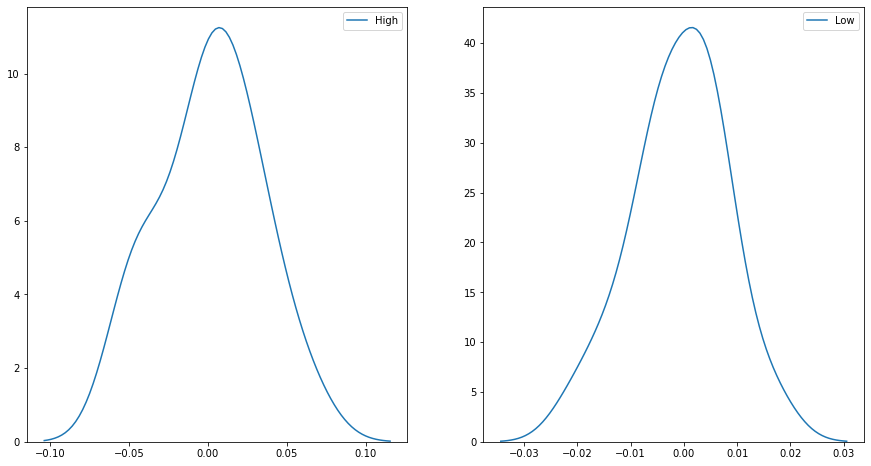

Residual autocorrelation High, Low


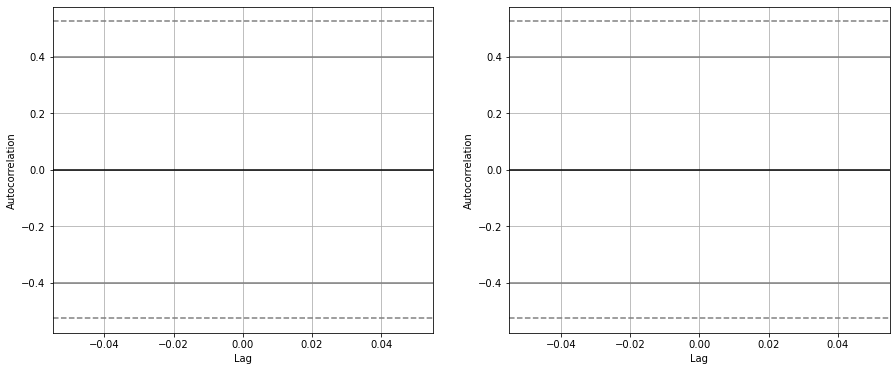

High residual description:
 count    18.000000
mean      0.001268
std       0.031980
min      -0.051231
25%      -0.015338
50%       0.003342
75%       0.021322
max       0.062937
Name: High, dtype: float64 

Low residual description:
 count    20.000000
mean     -0.000837
std       0.008764
min      -0.020284
25%      -0.005923
50%      -0.000201
75%       0.005538
max       0.016499
Name: Low, dtype: float64


In [36]:
#Group time series by month
df_monthly = df_time_series[["High", "Low"]].groupby(pd.PeriodIndex(df_time_series.index, freq='M'), axis=0).mean()
#Due to lack of months and difference of pattern, the analysis will start on 2018
df_monthly = df_monthly[df_monthly.index>"2017-12"]

#Analyze additive decomposition

decomposed_series_high = seasonal_decompose(df_monthly["High"], freq=6)
decomposed_series_low = seasonal_decompose(df_monthly["Low"], freq=5)

def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=True)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15,8))

plotseasonal(decomposed_series_high, axes[:,0])
plotseasonal(decomposed_series_low, axes[:,1])

plt.tight_layout()
plt.savefig("outputs\\decomposition.png")
plt.show()
plt.close()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,8))
sns.kdeplot(decomposed_series_high.resid.dropna(), ax =axes[0])
sns.kdeplot(decomposed_series_low.resid.dropna(), ax =axes[1])

plt.legend()
plt.savefig("outputs\\decomposition_residual_distribution.png")
plt.show()
plt.close()


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

print("Residual autocorrelation High, Low")
pd.plotting.autocorrelation_plot(decomposed_series_high.resid, axes[0])
pd.plotting.autocorrelation_plot(decomposed_series_low.resid, axes[1])

plt.show()

print("High residual description:\n", decomposed_series_high.resid.describe(), "\n")
print("Low residual description:\n",  decomposed_series_low.resid.describe())

In [37]:
df_monthly["High_observed"] = decomposed_series_high.observed.values
df_monthly["Low_observed"] = decomposed_series_low.observed.values
df_monthly["High_trend"] = decomposed_series_high.trend.values
df_monthly["Low_trend"] = decomposed_series_low.trend.values
df_monthly["High_seasonal"] = decomposed_series_high.seasonal.values
df_monthly["Low_seasonal"] = decomposed_series_low.seasonal.values
df_monthly["High_resid"] = decomposed_series_high.resid.values
df_monthly["Low_resid"] = decomposed_series_low.resid.values
df_monthly.head()

properties.unit.id,High,Low,High_observed,Low_observed,High_trend,Low_trend,High_seasonal,Low_seasonal,High_resid,Low_resid
2018-01,0.628017,0.225039,0.628017,0.225039,NaN,NaN,-0.036179,0.010536,NaN,NaN
2018-03,0.600299,0.220011,0.600299,0.220011,NaN,NaN,-0.012204,-0.002872,NaN,NaN
2018-04,0.595582,0.223058,0.595582,0.223058,NaN,0.229042,0.016082,-0.011560,NaN,0.005576
2018-05,0.626489,0.226857,0.626489,0.226857,0.618826,0.234934,0.025035,-0.002053,-0.017372,-0.006024
2018-06,0.658039,0.250247,0.658039,0.250247,0.605960,0.238773,0.024592,0.005950,0.027488,0.005525


# Conclusiones de decomposición

- Estadíos de 6 y 5 meses para las series:

Encontramos que tomando una frecuencia de 6 meses para la serie de tiempo de nivel de NDVI alto y una frecuencia de 5 meses para la seri de nivel de NDVI bajo, la distribución del residual de ambas series se acerca a una distribución normal, lo que indica cada uno de estos patrones es el que más información nos da sobre las series de tiempo, lo cual no distancia del ciclo de siembra y cosecha de las paltas y guarda relación con el gráfico de NDVI por mes del año (se probaron otros niveles de frecuencia).

- Tendencia positiva para NDVI bajo:

Podemos observar que la serie de NDVI bajo muestra una tendencia positiva de inicio a fin. Los cultivos de menor NDVI (y por ende menor producción en su mayoría) parecen estar mejorando en los últimos 2 años.

- La estacionalidad de los lotes con NDVI alto muestra picos altos más prolongados:

Podemos ver que la serie de tiempo de NDVI alto mantiene su nivel pico un mes, mientras que para series de tiempo con NDVI bajo el pico cae al mes siguiente de haberse alcanzado.
Hipótesis: Los lotes con NDVI alto pueden ser cosechados por más tiempo.

- El ruido no es completamente blanco:

Si bien la distribución residual se asemeja a una distribuación normal, no se muestra del todo claro. Es probable que haya factores externos que no se estén tomando en cuenta. Sin embargo, los residuos no muestran correlación.

- Diferencia de variabilidad marcada en la estacionalidad:

Se puede observar que la estacionalidad de la serie para NDVI altos muestra una variabilidad mayor a la serie para NDVI bajos. Esto refuerza los hallazgos relacionados a la desviación estándar del análisis de correlación.

# Moving stats and fuller test

In [51]:
df_monthly["High_moving_average"] = df_monthly["High"].rolling(window=6).mean()
df_monthly["Low_moving_average"] = df_monthly["Low"].rolling(window=5).mean()
df_monthly["High_moving_std"] = df_monthly["High"].rolling(window=6).std()
df_monthly["Low_moving_std"] = df_monthly["Low"].rolling(window=5).std()
df_monthly["Low_log"] = df_monthly["Low"].rolling(window=5).std()

df_monthly.index = df_monthly.index.to_timestamp()
df_monthly.to_excel("outputs\\df_monthly.xlsx")

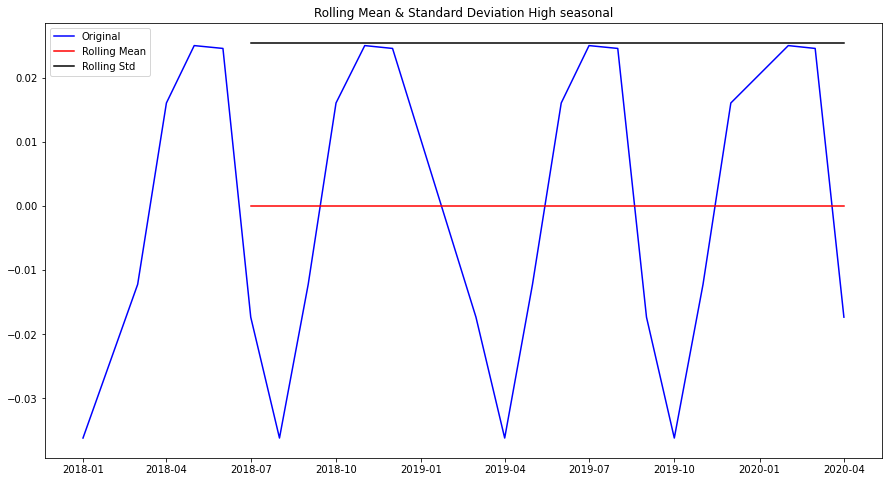

Results of Dickey-Fuller Test:
Test Statistic                -2.512282e+14
p-value                        0.000000e+00
#Lags Used                     5.000000e+00
Number of Observations Used    1.800000e+01
Critical Value (1%)           -3.859073e+00
Critical Value (5%)           -3.042046e+00
Critical Value (10%)          -2.660906e+00
dtype: float64


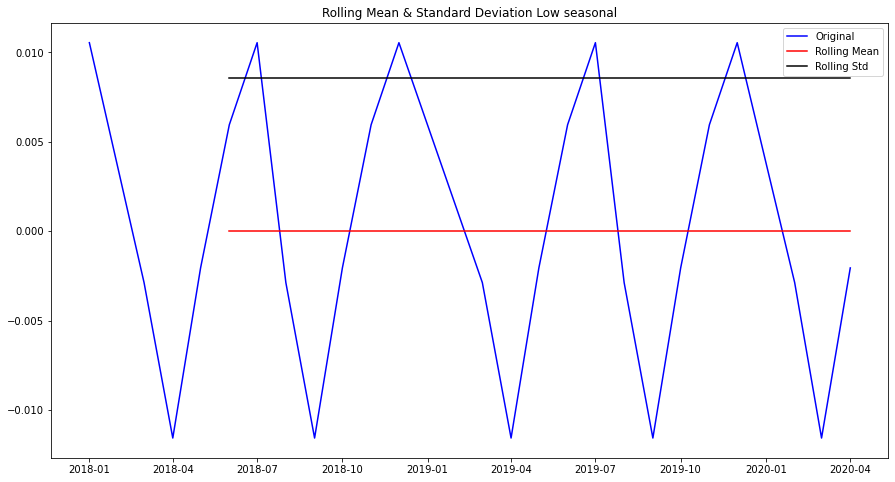

Results of Dickey-Fuller Test:
Test Statistic                -2.460788e+13
p-value                        0.000000e+00
#Lags Used                     7.000000e+00
Number of Observations Used    1.600000e+01
Critical Value (1%)           -3.924019e+00
Critical Value (5%)           -3.068498e+00
Critical Value (10%)          -2.673893e+00
dtype: float64


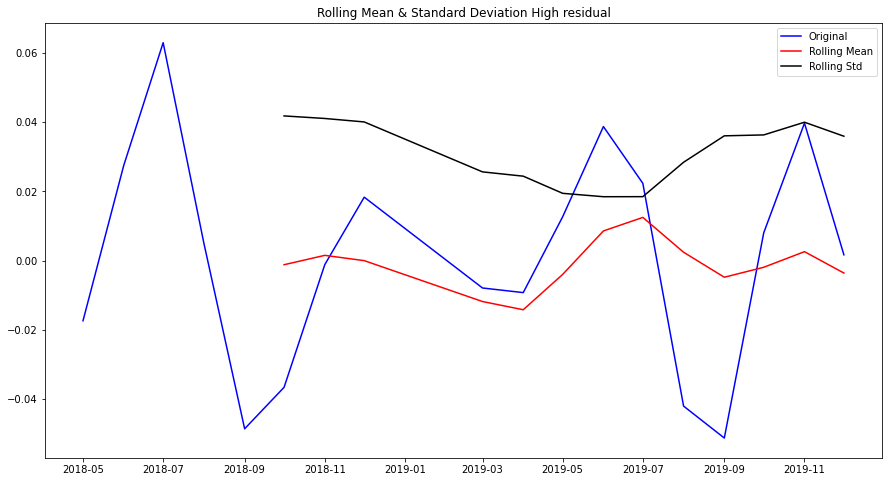

Results of Dickey-Fuller Test:
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


C:\Users\USUARIO\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


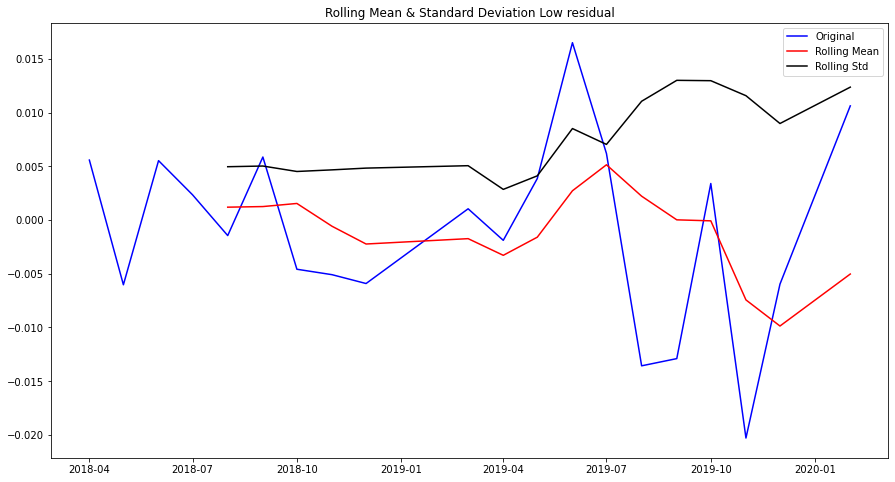

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [57]:
sns.lineplot(data = df_monthly["High_moving_average"], dashes = False, label = "High_moving_average", color = "green")
sns.lineplot(data = df_monthly["Low_moving_average"], dashes = False, label = "Low_moving_average", color = "red")

plt.savefig("outputs\\moving_average.png")


In [ ]:
def test_stationarity(timeseries, window, timeseries_name):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()
#Plot rolling statistics:
    fig, ax = plt.subplots(figsize=(15,8))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation ' + timeseries_name)
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Predict production
Fast try to predict the production level for a lot with NDVI_cols_2019_before_09 columns with a linear regression

In [12]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, r2_score

In [13]:
X = df[NDVI_cols_2019_before_09]
y = df["Kg/Ha"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outliers', RobustScaler()),
    ('normalizer', Normalizer())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NDVI_cols_2019_before_09)])
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression(n_jobs=1, fit_intercept=True))
        ])
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(f'Train datasets: X: {X_train.shape}, Y: {y_train.shape}')
print(f'Test datasets: X: {X_test.shape}, Y: {y_test.shape}')


LReg = pipe.fit(X_train, y_train)
LReg

Train datasets: X: (24, 21), Y: (24,)
Test datasets: X: (9, 21), Y: (9,)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                               

In [14]:
y_train_pred = LReg.predict(X_train)
y_test_pred = LReg.predict(X_test)

print('TRAIN score: ', r2_score(y_train, y_train_pred))
print('TEST score: ', r2_score(y_test, y_test_pred))

print(y_test)
print(pd.DataFrame(y_test_pred))

TRAIN score:  0.9714220022189213
TEST score:  -30.180299745831764
2     4658.420440
1     4037.375179
12    5492.066599
25     791.561625
29     746.876592
28     920.454738
0     3581.158766
31    1151.521331
27    1474.845976
Name: Kg/Ha, dtype: float64
              0
0  10239.828884
1  22950.915222
2  -7550.802656
3  -1293.011272
4   2810.206123
5   -139.404298
6 -14168.706631
7   1745.216739
8   -545.593982


El modelo muestra un nivel alto de overfitting, el nivel de NDVI en las fechas obtenidas y la cantidad de lotes no son suficientes para predecir el nivel de producción